# Análisis de datos del detector Escaramujo - Machín

En este informe se presentan los resultados del análisis de datos registrados por el detector Escaramujo 
en el volcán Cerro Machín para medir el fondo de radiación del sitio.

### Configuración del instrumento

El instrumento se dispuso apuntando en un ángulo de cero grados respecto al zenith con una distancia entre placas de 5 cm. El voltaje de polarizaciónde los canales se estableció en 29.5 V.

### Comandos básicos

minicom
    
    DG        Acceso al GPS
    TH        Acceso a los datos de temperatura
    TL 4 30   Establece los umbrales de discriminación de los 4 canales en 300 mV
    WC 00 27  Establece la triple coincidencia entre los tres primeros canales CH0,CH1 y CH2
    CE        Inicia el registro
    
    CTRL + A  Z   Ayuda
    CTRL + A  X   Salir del minicom

In [1]:
import sys 
import numpy as np
from datetime import datetime
from glob import glob
import matplotlib.pyplot as plt

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
# Load the recorded data at Machin volcanoe

path = "data/Escaramujo/Machin_Zenith_06.dat"
file = open(path,"r")
    
# Set rising and falling edge vectors

re0 = [] 
fe0 = []
re1 = [] 
fe1 = []
re2 = [] 
fe2 = []
tiempo = [] 
for line in file:
    lst = line.split(' ')
    if lst[0] != "ST":
        #print lst[0]
        tiempo.append(lst[10])
        re0.append(lst[1])
        fe0.append(lst[2])
        re1.append(lst[3])
        fe1.append(lst[4])
        re2.append(lst[5])
        fe2.append(lst[6])

In [3]:
# Convert rising and falling edge words from hexadecimal to binary values for determining valid events

N = len(re0)

re0_bi = []
fe0_bi = [] 
re1_bi = []
fe1_bi = []
re2_bi = []
fe2_bi = []

for i in range (N): 
        bi0 = "{0:08b}".format(int(re0[i], 16))
        re0_bi.append(bi0) 
        bif0 = "{0:08b}".format(int(fe0[i], 16))
        fe0_bi.append(bif0)  
        bi1 = "{0:08b}".format(int(re1[i], 16))
        re1_bi.append(bi1) 
        bif1 = "{0:08b}".format(int(fe1[i], 16))
        fe1_bi.append(bif1)
        bi2 = "{0:08b}".format(int(re2[i], 16))
        re2_bi.append(bi2) 
        bif2 = "{0:08b}".format(int(fe2[i], 16))
        fe2_bi.append(bif2)

# Filtering of valid events

counta = 0
val_filt = []
filt = []

for i in range (N): 
    if (re0_bi[i][2] == "1" or fe0_bi[i][2] == "1") and (re1_bi[i][2] == "1" or fe1_bi[i][2] == "1") and (re2_bi[i][2]  == "1" or fe2_bi[i][2] == "1"):
        val_filt = [re0_bi[i], fe0_bi[i], re1_bi[i], fe1_bi[i], re2_bi[i], fe2_bi[i], tiempo[i]]
        counta = counta + 1
        filt.append(val_filt)
        
print ("Numero de eventos validos: " + str(counta))

Numero de eventos validos: 4931


In [4]:
# Calculating the rate per second and minute

filt = np.asarray(filt)

rate_s = []
Ni = len(filt)
count_es = 0

# Event rate per second

for i in range(Ni-1):
    
    time_dif_s = float(filt[i+1, 6]) - float(filt[i, 6])
    
    if (time_dif_s == 0):
        count_es = count_es + 1
    elif (time_dif_s != 0):
        rate_s.append([int(float(filt[i, 6])), count_es])
        count_es = 0
                      
# Event rate per minute

rate_s = np.asarray(rate_s)

Ns = len(rate_s)

rate_m = []
count_em = 0

rate_mi = 0
time_in = rate_s[0, 0]

for i in range(Ns-1):
    
    time_dif_m = rate_s[i+1, 0] - time_in

    if time_dif_m <= 60:
        
        count_em = count_em + rate_s[i, 1]
        
    else:
        rate_m.append([time_in, count_em])
        count_em = 0
        time_in = rate_s[i, 0]

rate_m = np.asarray(rate_m)        

In [5]:
Area = float(25*25)

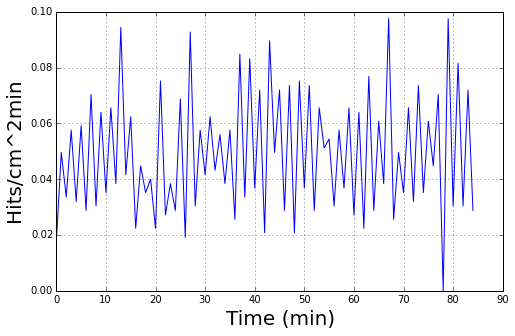

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(rate_m[:,1]/Area)
plt.ylabel(r'Hits/cm^2min', fontsize = 20)
plt.xlabel('Time (min)', fontsize = 20)
plt.grid()